In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
learning_rate = 0.0008
num_classes = 2
model_name = "mobilenet_v2"
output_dir = "outputs/models/augmented"
os.makedirs(output_dir, exist_ok=True)


In [5]:
print("[INFO] Loading augmented datasets...")
train_loader, val_loader, test_loader = load_datasets(
    data_dir=data_dir, batch_size=batch_size, augmentation="augmented"
)
print("[INFO] Augmented datasets loaded successfully!")

2024-12-21 21:36:33,921 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'augmented'.
2024-12-21 21:36:33,922 - INFO - Applying moderate augmentations: Flip, Rotate, and ColorJitter.
2024-12-21 21:36:33,929 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-21 21:36:33,932 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-21 21:36:33,934 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-21 21:36:33,935 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-21 21:36:33,935 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-21 21:36:33,935 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-21 21:36:33,937 - INFO - Class 'fire' has 730 samples.
2024-12-21 21:36:33,938 - INFO - Class 'nofire' has 1157 samples.
2024-12-21 21:36:33,939 - INFO - Computed class weights: {'fire': 2.58493

[INFO] Loading augmented datasets...


2024-12-21 21:36:35,763 - INFO - DataLoaders created successfully.


[INFO] Augmented datasets loaded successfully!


In [6]:
# Initialize the model
print(f"\n[INFO] Starting Training for Model: {model_name} with Augmented Data\n")
print(f"[INFO] Initializing {model_name} model...")
model = initialize_model(
    model_name=model_name,
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline augmentation: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Training for Model: mobilenet_v2 with Augmented Data

[INFO] Initializing mobilenet_v2 model...
[INFO] Model initialized successfully!


In [7]:
# Define loss function and optimizer
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
# Train the model

from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
print("[INFO] Starting model training with augmented data...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,  # No LR scheduler for augmented baseline
    device=device,
    save_path=os.path.join(output_dir, f"{model_name}_augmented.pt"),
    early_stop_patience=10,  # Early stopping patience
    monitor_metric="val_f1"
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training with augmented data...

Starting training...



[INFO] Learning rate adjusted to: 0.000800
[INFO] Best model saved with val_f1: 0.8383
Epoch [1]: Train Loss: 0.5900, Train Acc: 0.7006 | Val Loss: 0.5011, Val Acc: 0.8109, Val Recall: 0.8008, Val F1: 0.8383


[INFO] Learning rate adjusted to: 0.000800
[INFO] Best model saved with val_f1: 0.8595
Epoch [2]: Train Loss: 0.4617, Train Acc: 0.7981 | Val Loss: 0.4480, Val Acc: 0.8308, Val Recall: 0.8455, Val F1: 0.8595


[INFO] Learning rate adjusted to: 0.000800
[INFO] No improvement in val_f1. Patience: 1/10
Epoch [3]: Train Loss: 0.4217, Train Acc: 0.8103 | Val Loss: 0.4249, Val Acc: 0.8085, Val Recall: 0.8008, Val F1: 0.8365


[INFO] Learning rate adjusted to: 0.000800
[INFO] No improvement in val_f1. Patience: 2/10
Epoch [4]: Train Loss: 0.3935, Train Acc: 0.8182 | Val Loss: 0.4483, Val Acc: 0.7985, Val Recall: 0.7480, Val F1: 0.8196


[INFO] Learning rate adjusted to: 0.000400
[INFO] Best model saved with val_f1: 0.8601
Epoch [5]: Train Loss: 0.3981, Train Acc: 0.8188 | Val Loss: 0.3947, Val Acc: 0.8308, Val Recall: 0.8496, Val F1: 0.8601


[INFO] Learning rate adjusted to: 0.000400
[INFO] Best model saved with val_f1: 0.8655
Epoch [6]: Train Loss: 0.3577, Train Acc: 0.8495 | Val Loss: 0.3999, Val Acc: 0.8408, Val Recall: 0.8374, Val F1: 0.8655


[INFO] Learning rate adjusted to: 0.000400
[INFO] No improvement in val_f1. Patience: 1/10
Epoch [7]: Train Loss: 0.3759, Train Acc: 0.8315 | Val Loss: 0.4085, Val Acc: 0.8333, Val Recall: 0.8699, Val F1: 0.8646


[INFO] Learning rate adjusted to: 0.000400
[INFO] No improvement in val_f1. Patience: 2/10
Epoch [8]: Train Loss: 0.3719, Train Acc: 0.8389 | Val Loss: 0.4062, Val Acc: 0.8060, Val Recall: 0.8171, Val F1: 0.8375


[INFO] Learning rate adjusted to: 0.000400
[INFO] No improvement in val_f1. Patience: 3/10
Epoch [9]: Train Loss: 0.3475, Train Acc: 0.8468 | Val Loss: 0.4052, Val Acc: 0.8284, Val Recall: 0.8333, Val F1: 0.8559


[INFO] Learning rate adjusted to: 0.000200
[INFO] No improvement in val_f1. Patience: 4/10
Epoch [10]: Train Loss: 0.3839, Train Acc: 0.8241 | Val Loss: 0.3922, Val Acc: 0.8209, Val Recall: 0.8211, Val F1: 0.8487


[INFO] Learning rate adjusted to: 0.000200
[INFO] No improvement in val_f1. Patience: 5/10
Epoch [11]: Train Loss: 0.3888, Train Acc: 0.8140 | Val Loss: 0.3712, Val Acc: 0.8308, Val Recall: 0.8577, Val F1: 0.8612


[INFO] Learning rate adjusted to: 0.000200
[INFO] No improvement in val_f1. Patience: 6/10
Epoch [12]: Train Loss: 0.3565, Train Acc: 0.8421 | Val Loss: 0.3839, Val Acc: 0.8308, Val Recall: 0.8699, Val F1: 0.8629


[INFO] Learning rate adjusted to: 0.000200
[INFO] Best model saved with val_f1: 0.8685
Epoch [13]: Train Loss: 0.3562, Train Acc: 0.8442 | Val Loss: 0.3802, Val Acc: 0.8433, Val Recall: 0.8455, Val F1: 0.8685


[INFO] Learning rate adjusted to: 0.000200
[INFO] No improvement in val_f1. Patience: 1/10
Epoch [14]: Train Loss: 0.3625, Train Acc: 0.8463 | Val Loss: 0.4019, Val Acc: 0.8234, Val Recall: 0.8211, Val F1: 0.8505


[INFO] Learning rate adjusted to: 0.000100
[INFO] Best model saved with val_f1: 0.8844
Epoch [15]: Train Loss: 0.3387, Train Acc: 0.8564 | Val Loss: 0.3710, Val Acc: 0.8582, Val Recall: 0.8862, Val F1: 0.8844


[INFO] Learning rate adjusted to: 0.000100
[INFO] No improvement in val_f1. Patience: 1/10
Epoch [16]: Train Loss: 0.3538, Train Acc: 0.8553 | Val Loss: 0.3939, Val Acc: 0.8383, Val Recall: 0.8455, Val F1: 0.8649


[INFO] Learning rate adjusted to: 0.000100
[INFO] No improvement in val_f1. Patience: 2/10
Epoch [17]: Train Loss: 0.3469, Train Acc: 0.8553 | Val Loss: 0.3768, Val Acc: 0.8483, Val Recall: 0.8618, Val F1: 0.8742


[INFO] Learning rate adjusted to: 0.000100
[INFO] No improvement in val_f1. Patience: 3/10
Epoch [18]: Train Loss: 0.3549, Train Acc: 0.8458 | Val Loss: 0.3793, Val Acc: 0.8284, Val Recall: 0.8415, Val F1: 0.8571


[INFO] Learning rate adjusted to: 0.000100
[INFO] No improvement in val_f1. Patience: 4/10
Epoch [19]: Train Loss: 0.3457, Train Acc: 0.8458 | Val Loss: 0.3842, Val Acc: 0.8209, Val Recall: 0.8333, Val F1: 0.8506


[INFO] Learning rate adjusted to: 0.000050
[INFO] No improvement in val_f1. Patience: 5/10
Epoch [20]: Train Loss: 0.3617, Train Acc: 0.8357 | Val Loss: 0.3907, Val Acc: 0.8209, Val Recall: 0.8415, Val F1: 0.8519


[INFO] Learning rate adjusted to: 0.000050
[INFO] No improvement in val_f1. Patience: 6/10
Epoch [21]: Train Loss: 0.3332, Train Acc: 0.8606 | Val Loss: 0.3527, Val Acc: 0.8483, Val Recall: 0.8699, Val F1: 0.8753


[INFO] Learning rate adjusted to: 0.000050
[INFO] No improvement in val_f1. Patience: 7/10
Epoch [22]: Train Loss: 0.3537, Train Acc: 0.8442 | Val Loss: 0.3712, Val Acc: 0.8408, Val Recall: 0.8699, Val F1: 0.8699


[INFO] Learning rate adjusted to: 0.000050
[INFO] No improvement in val_f1. Patience: 8/10
Epoch [23]: Train Loss: 0.3508, Train Acc: 0.8474 | Val Loss: 0.3642, Val Acc: 0.8433, Val Recall: 0.8537, Val F1: 0.8696


[INFO] Learning rate adjusted to: 0.000050
[INFO] No improvement in val_f1. Patience: 9/10
Epoch [24]: Train Loss: 0.3351, Train Acc: 0.8543 | Val Loss: 0.3825, Val Acc: 0.8333, Val Recall: 0.8618, Val F1: 0.8635


[INFO] Learning rate adjusted to: 0.000025
[INFO] No improvement in val_f1. Patience: 10/10
Epoch [25]: Train Loss: 0.3650, Train Acc: 0.8336 | Val Loss: 0.3711, Val Acc: 0.8557, Val Recall: 0.8496, Val F1: 0.8782
[INFO] Final metrics saved to outputs/models/augmented\final_metrics.json
[INFO] Training stopped after 25 epochs. Best val_f1: 0.8844

[INFO] Training completed successfully!


In [9]:
# Evaluate the model
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device
)
print(f"\n[INFO] Metrics for {model_name} with Augmented Data:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/logs\model\model_evaluation.json

[INFO] Metrics for mobilenet_v2 with Augmented Data:
{'classification_report': {'No Fire': {'precision': 0.7988826815642458, 'recall': 0.89937106918239, 'f1-score': 0.8461538461538461, 'support': 159.0}, 'Fire': {'precision': 0.9307359307359307, 'recall': 0.8565737051792829, 'f1-score': 0.8921161825726142, 'support': 251.0}, 'accuracy': 0.8731707317073171, 'macro avg': {'precision': 0.8648093061500883, 'recall': 0.8779723871808365, 'f1-score': 0.8691350143632302, 'support': 410.0}, 'weighted avg': {'precision': 0.8796025975205699, 'recall': 0.8731707317073171, 'f1-score': 0.8742917643028968, 'support': 410.0}}, 'confusion_matrix': [[143, 16], [36, 215]], 'roc_auc': 0.933473652559573, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[INFO] Saving training and evaluation results...
[INFO] Training plot saved to outputs/models/augmented\mobilenet_v2_augmented_training_curve.png
[INFO] Confusion matrix saved to outputs/models/augmented\mobilenet_v2_augmented_confusion_matrix.png
[INFO] ROC curve saved to outputs/models/augmented\mobilenet_v2_augmented_roc_curve.png
[INFO] Precision-Recall curve saved to outputs/models/augmented\mobilenet_v2_augmented_precision_recall.png
[INFO] All results saved successfully!


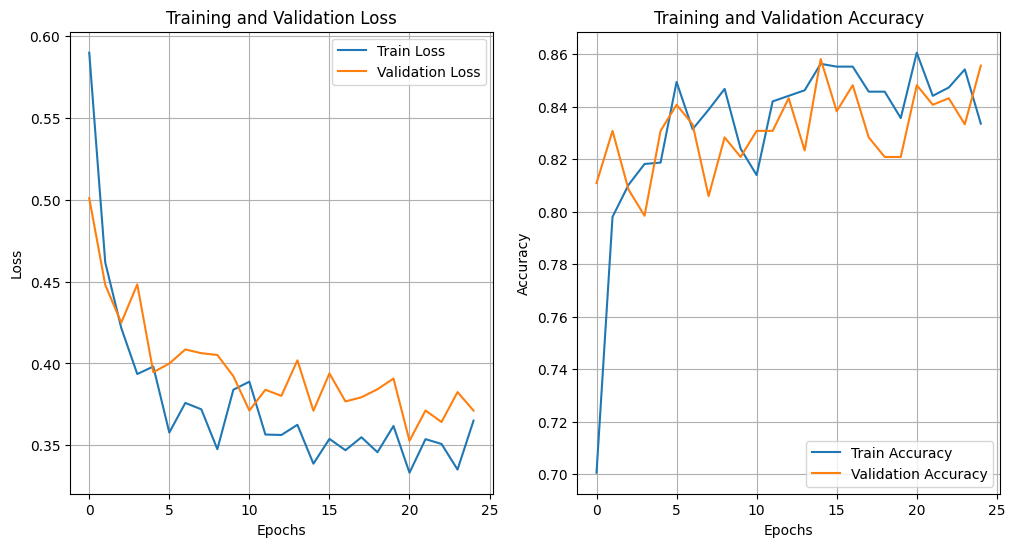

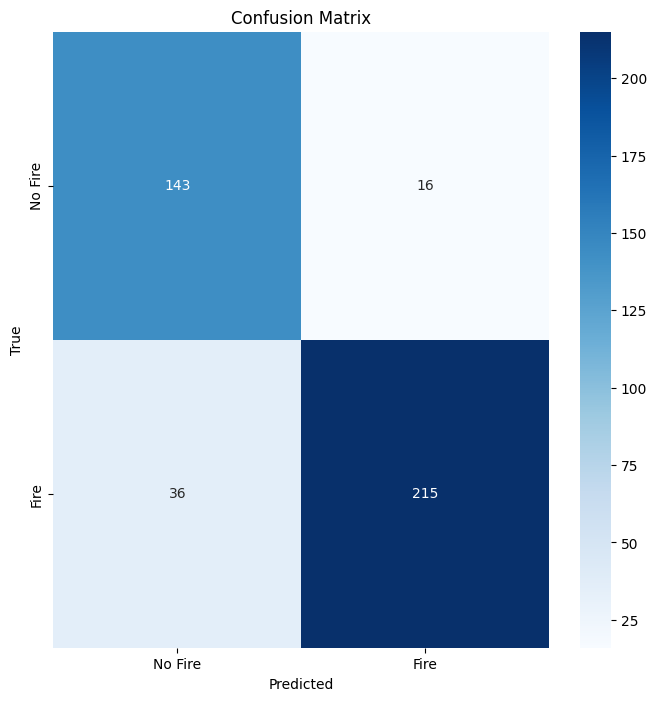

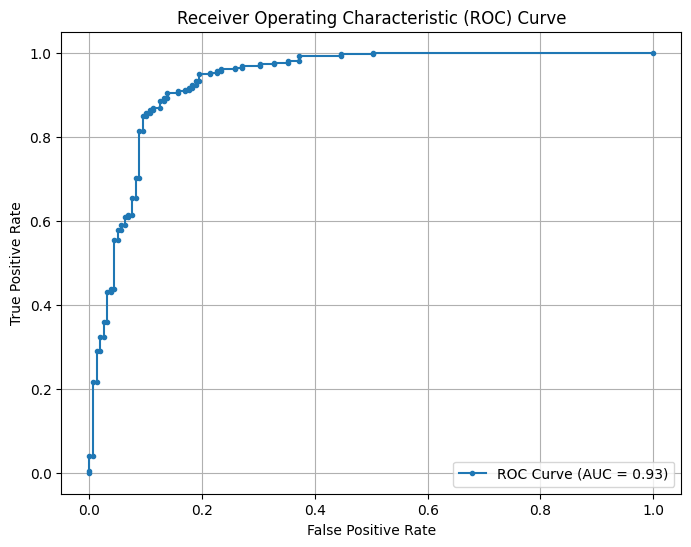

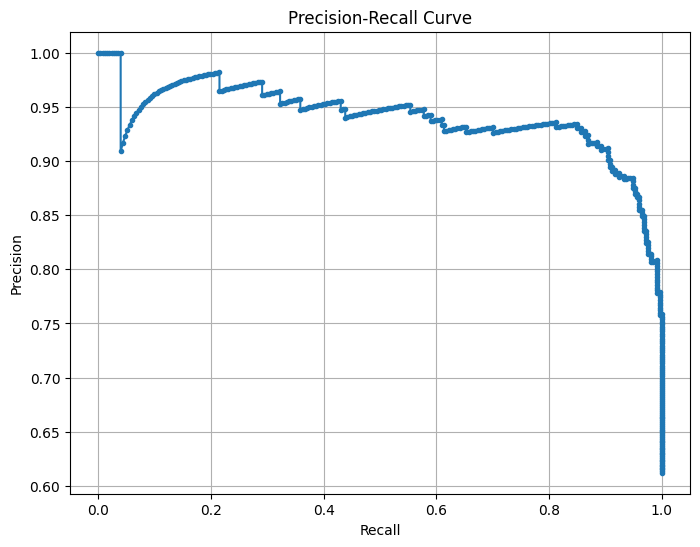

In [10]:
print("[INFO] Saving training and evaluation results...")

# Training curve
plot_training(
    history, output_path=os.path.join(output_dir, f"{model_name}_augmented_training_curve.png")
)

# Confusion matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=os.path.join(output_dir, f"{model_name}_augmented_confusion_matrix.png")
)

# ROC Curve
plot_roc_curve(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(output_dir, f"{model_name}_augmented_roc_curve.png")
)

# Precision-Recall Curve
plot_precision_recall(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(output_dir, f"{model_name}_augmented_precision_recall.png")
)

print("[INFO] All results saved successfully!")